In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

# Step 1: Load and Preprocess the Data
data = pd.read_csv('/content/Wind Data (1).csv')  # Replace with your actual dataset path

# Check the columns of your dataset to ensure correct target column
print("Columns in dataset:", data.columns)

# If needed, clean column names (e.g., remove spaces, special characters)
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

# Select the target column (update with the correct target column name)
# The target column in your case is 'Air Density'
target_column = 'Air_Density'  # Since this is already known from the dataset
print(f"Target column: {target_column}")

# Separate the target column and feature columns
target_data = data[[target_column]].values
feature_data = data.drop(columns=[target_column]).values  # All other columns are features

# Step 2: Check for non-numeric values in the dataset
# Convert all columns to numeric, forcing errors to NaN (useful for identifying problematic entries)
data = data.apply(pd.to_numeric, errors='coerce')

# Check for any columns that have NaN values (i.e., non-numeric values)
print(f"Missing values in dataset after conversion:\n{data.isna().sum()}")

# Handle missing values - Filling missing values with the mean of each column
data = data.fillna(data.mean())

# Verify that there are no more missing values
print(f"Missing values in dataset after filling:\n{data.isna().sum()}")

# Scale the feature and target data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values)

# Create sequences for the RNN (time series data)
time_step = 10
X, y = [], []
for i in range(len(data_scaled) - time_step - 1):
    X.append(data_scaled[i:(i + time_step), :])  # Use all features for X
    y.append(data_scaled[i + time_step, -1])  # Use the last column (target) for y

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split into training and testing sets (80% - 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Columns in dataset: Index(['Latitude', 'Longitude', 'Air temperature', 'Relative humidity',
       'Daily solar radiation - horizontal', 'Atmospheric pressure',
       'Earth temperature', 'Heating degree-days', 'Cooling degree-days',
       'Elevation', 'Heating design temperature', 'Cooling design temperature',
       'Earth temperature amplitude', 'Frost days at site',
       'Monthly Wind power density', 'Air Density'],
      dtype='object')
Target column: Air_Density
Missing values in dataset after conversion:
Latitude                                0
Longitude                               1
Air_temperature                         0
Relative_humidity                     180
Daily_solar_radiation_-_horizontal      0
Atmospheric_pressure                    0
Earth_temperature                       0
Heating_degree-days                     0
Cooling_degree-days                     0
Elevation                               0
Heating_design_temperature              0
Cooling_design_te

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))



**1. Simple Recurrent Neural Network (RNN)**




In [5]:
# 1. Simple RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: nan
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan  
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 17/50
5/5 ━━━━━━━━━━━━



**2. LSTM Model (with Sigmoid in LSTM cells and Linear in Output)**



In [6]:
# 2. LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='linear')
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: nan
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan  
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan  
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan  
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 17/50
5/

**3. Gated Recurrent Unit (GRU)**

In [7]:
# 3. GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: nan
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan  
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan  
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan  


**4. Bidirectional LSTM Model**


In [8]:
# 4. Bidirectional LSTM Model
bi_lstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
bi_lstm_model.compile(optimizer='adam', loss='mse')
bi_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: nan
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: nan
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: nan
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan 
Epoch 17/50
5/5 ━━━━━━━━━━━

**Model Evaluation**

In [9]:
def evaluate_model(model, X_test, y_test, scaler):
    # Make predictions
    predictions = model.predict(X_test)

    # Check for NaN in predictions before inverse transform
    if np.isnan(predictions).any():
        print("Warning: Predictions contain NaN values.")
        predictions = np.nan_to_num(predictions)  # Replace NaN with 0

    # Inverse transform the predictions and the actual target values
    predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], X_test.shape[2] - 1)), predictions)))[:, -1]
    y_test_actual = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], X_test.shape[2] - 1)), y_test.reshape(-1, 1))))[:, -1]

    # Check for NaN in transformed data
    if np.isnan(y_test_actual).any() or np.isnan(predictions).any():
        print("Warning: Transformed data contains NaN values.")
        y_test_actual = np.nan_to_num(y_test_actual)
        predictions = np.nan_to_num(predictions)

    # Calculate metrics
    mse = mean_squared_error(y_test_actual, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_actual, predictions)
    r2 = r2_score(y_test_actual, predictions)

    return mse, rmse, mae, r2

In [10]:
for model, name in zip([rnn_model, lstm_model, gru_model, bi_lstm_model],
                       ['Simple RNN', 'LSTM', 'GRU', 'Bidirectional LSTM']):
    mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test, scaler)
    print(f"{name} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Simple RNN - MSE: 0.009414588235294102, RMSE: 0.09702880106078865, MAE: 0.08647058823529405, R2: -3.859328899334904
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
LSTM - MSE: 0.009414588235294102, RMSE: 0.09702880106078865, MAE: 0.08647058823529405, R2: -3.859328899334904


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
GRU - MSE: 0.009414588235294102, RMSE: 0.09702880106078865, MAE: 0.08647058823529405, R2: -3.859328899334904
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step
Bidirectional LSTM - MSE: 0.009414588235294102, RMSE: 0.09702880106078865, MAE: 0.08647058823529405, R2: -3.859328899334904



Evaluating Simple RNN model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


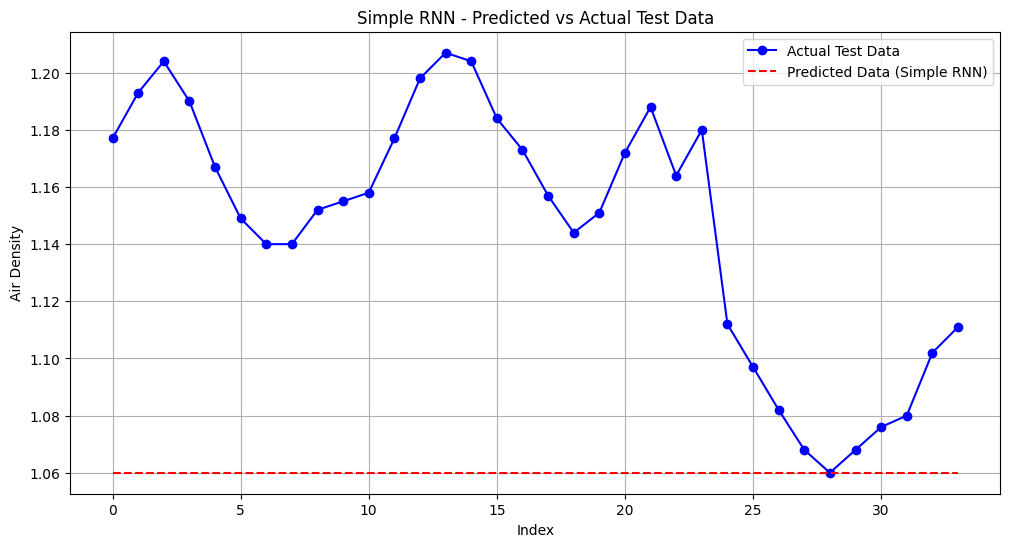

Data successfully saved to Simple RNN_data_comparison.xlsx

Evaluating LSTM model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


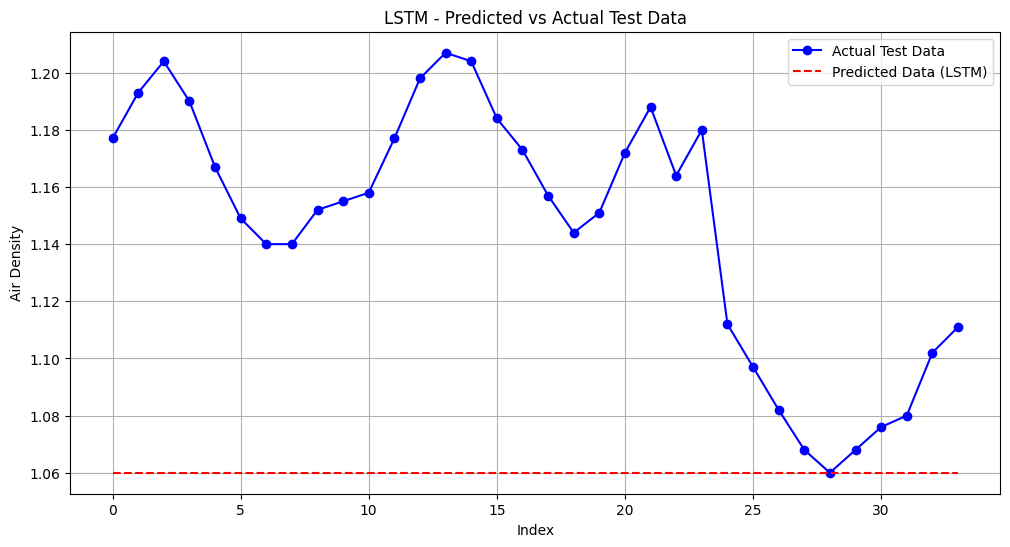

Data successfully saved to LSTM_data_comparison.xlsx

Evaluating GRU model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


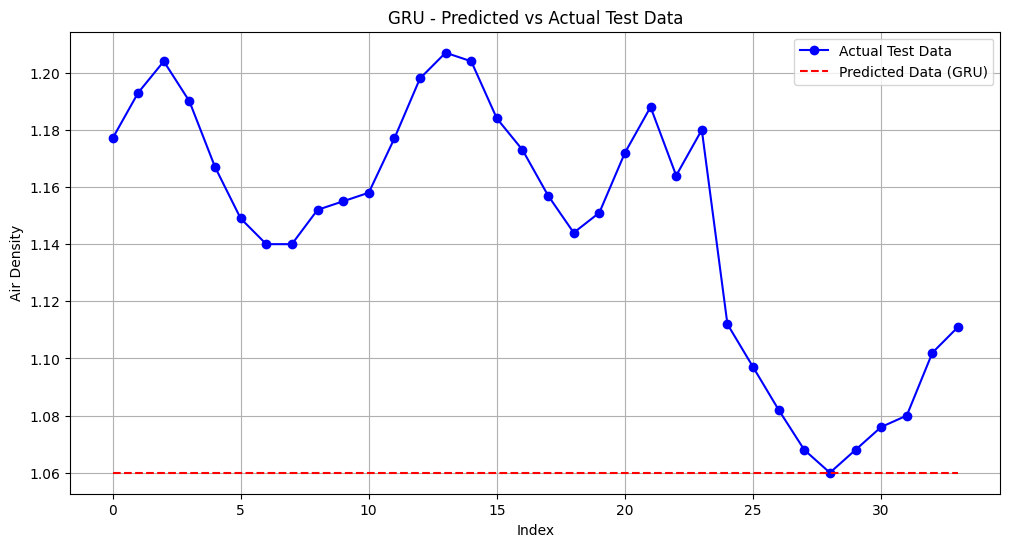

Data successfully saved to GRU_data_comparison.xlsx

Evaluating Bidirectional LSTM model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


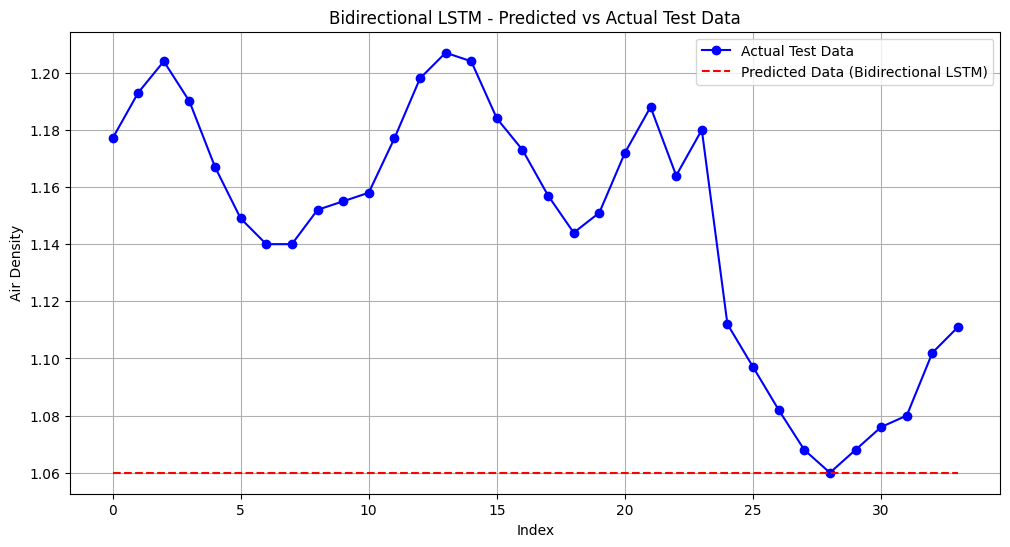

Data successfully saved to Bidirectional LSTM_data_comparison.xlsx


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to evaluate, plot, and save data for a given model
def plot_and_save(model, X_test, y_test, scaler, model_name):
    # Generate predictions
    predictions = model.predict(X_test)

    # Handle NaN predictions
    if np.isnan(predictions).any():
        print(f"Warning: {model_name} predictions contain NaN values.")
        predictions = np.nan_to_num(predictions)

    # Inverse transform the predictions and actual values
    predictions = scaler.inverse_transform(
        np.hstack((np.zeros((predictions.shape[0], X_test.shape[2] - 1)), predictions))
    )[:, -1]
    y_test_actual = scaler.inverse_transform(
        np.hstack((np.zeros((y_test.shape[0], X_test.shape[2] - 1)), y_test.reshape(-1, 1)))
    )[:, -1]

    # Plot training, testing, and predicted data
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_actual, label="Actual Test Data", color="blue", marker="o")
    plt.plot(predictions, label=f"Predicted Data ({model_name})", color="red", linestyle="--")
    plt.xlabel("Index")
    plt.ylabel("Air Density")
    plt.title(f"{model_name} - Predicted vs Actual Test Data")
    plt.legend()
    plt.grid()
    plt.show()

    # Save data to Excel
    data_dict = {
        "Actual Test Data": y_test_actual,
        f"Predicted Data ({model_name})": predictions,
    }
    df = pd.DataFrame(data_dict)
    output_file = f"{model_name}_data_comparison.xlsx"
    df.to_excel(output_file, index=False)
    print(f"Data successfully saved to {output_file}")

# Evaluate and plot for each model
models = [rnn_model, lstm_model, gru_model, bi_lstm_model]
model_names = ["Simple RNN", "LSTM", "GRU", "Bidirectional LSTM"]

for model, name in zip(models, model_names):
    print(f"\nEvaluating {name} model...")
    plot_and_save(model, X_test, y_test, scaler, name)
